# Framework com Arvore de Decisao Fidus

## Objetivo do Projeto


In [808]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import warnings

In [ ]:
###Coleta de Dados Yahoo Finance

""""symbol = 'GC=F'
start_date = "2025-11-01"
end_date = "2025-12-15"

df = yf.download(symbol, start=start_date, end=end_date, interval='15m')

print(df.head())

df.to_csv(f"{symbol}_data.csv")
print(f"Data Saved to {symbol}_data.csv")

""""


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_109592\2035634687.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date, interval='15m')
[*********************100%***********************]  1 of 1 completed

Price                            Close         High          Low         Open  \
Ticker                            GC=F         GC=F         GC=F         GC=F   
Datetime                                                                        
2025-11-02 23:00:00+00:00  4006.199951  4006.500000  4001.800049  4001.899902   
2025-11-02 23:15:00+00:00  4004.899902  4009.000000  3998.000000  4006.399902   
2025-11-02 23:30:00+00:00  3989.000000  4006.000000  3988.100098  4004.600098   
2025-11-02 23:45:00+00:00  3989.699951  3995.800049  3988.100098  3990.000000   
2025-11-03 00:00:00+00:00  3978.199951  3998.300049  3976.000000  3990.000000   

Price                     Volume  
Ticker                      GC=F  
Datetime                          
2025-11-02 23:00:00+00:00    221  
2025-11-02 23:15:00+00:00   1767  
2025-11-02 23:30:00+00:00   1905  
2025-11-02 23:45:00+00:00   1678  
2025-11-03 00:00:00+00:00   4008  
Data Saved to GC=F_data.csv


In [810]:
df_xau = pd.read_csv("data2/XAU_4h_data.csv", delimiter = ';')

In [811]:
df_xau.shape

(32550, 6)

In [812]:
df_xau.head()

,Date,Open,High,Low,Close,Volume
0,2004.06.11 04:00,384.0,384.3,383.3,383.8,44
1,2004.06.11 08:00,383.8,384.3,382.8,383.6,152
2,2004.06.11 12:00,383.5,384.6,383.3,384.6,48
3,2004.06.11 16:00,384.3,384.8,383.8,384.1,28
4,2004.06.14 00:00,384.3,384.5,382.3,382.6,124


In [813]:
df_xau.describe()

,Open,High,Low,Close,Volume
count,32550.000000,32550.000000,32550.000000,32550.000000,32550.000000
mean,1380.536292,1384.311703,1376.637618,1380.594959,12975.728725
std,591.576176,593.132185,590.006885,591.681968,13990.000580
min,382.300000,383.100000,381.100000,382.000000,1.000000
25%,1061.047500,1064.247500,1057.735000,1060.802500,3122.000000
50%,1297.130000,1299.775000,1294.340000,1297.165000,9896.000000
75%,1735.087500,1739.515000,1730.350000,1735.100000,17869.750000
max,4254.980000,4256.340000,4245.900000,4255.040000,249196.000000


In [814]:
df_xau = df_xau.drop([0 , 1]) # remover indice 0 e 1 

In [815]:
df_xau.head()

,Date,Open,High,Low,Close,Volume
2,2004.06.11 12:00,383.5,384.6,383.3,384.6,48
3,2004.06.11 16:00,384.3,384.8,383.8,384.1,28
4,2004.06.14 00:00,384.3,384.5,382.3,382.6,124
5,2004.06.14 04:00,382.6,383.3,382.3,382.6,139
6,2004.06.14 08:00,382.6,383.8,381.8,382.5,169


In [816]:
df_xau = df_xau.reset_index()

In [817]:
df_xau[['Close', 'High', 'Low', 'Open']] = df_xau[['Close', 'High', 'Low', 'Open']].astype(float)
df_xau[['Close', 'High', 'Low', 'Open']] = df_xau[['Close', 'High', 'Low', 'Open']].round(2)

In [818]:
df_xau.dtypes

index       int64
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [819]:
df_xau.head()

,index,Date,Open,High,Low,Close,Volume
0,2,2004.06.11 12:00,383.5,384.6,383.3,384.6,48
1,3,2004.06.11 16:00,384.3,384.8,383.8,384.1,28
2,4,2004.06.14 00:00,384.3,384.5,382.3,382.6,124
3,5,2004.06.14 04:00,382.6,383.3,382.3,382.6,139
4,6,2004.06.14 08:00,382.6,383.8,381.8,382.5,169


In [820]:
df_xau = df_xau.rename(columns={'Price': 'Date'})

In [821]:
df_xau.head()

,index,Date,Open,High,Low,Close,Volume
0,2,2004.06.11 12:00,383.5,384.6,383.3,384.6,48
1,3,2004.06.11 16:00,384.3,384.8,383.8,384.1,28
2,4,2004.06.14 00:00,384.3,384.5,382.3,382.6,124
3,5,2004.06.14 04:00,382.6,383.3,382.3,382.6,139
4,6,2004.06.14 08:00,382.6,383.8,381.8,382.5,169


In [822]:
df_xau['Date'] = pd.to_datetime(df_xau['Date'])

In [823]:
df_xau.head()

,index,Date,Open,High,Low,Close,Volume
0,2,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48
1,3,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28
2,4,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124
3,5,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139
4,6,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169


In [824]:
df_xau.head()

,index,Date,Open,High,Low,Close,Volume
0,2,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48
1,3,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28
2,4,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124
3,5,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139
4,6,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169


In [825]:
df_xau['Variacao'] = df_xau['Close'].diff()

In [826]:
df_xau.head()

,index,Date,Open,High,Low,Close,Volume,Variacao
0,2,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN
1,3,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5
2,4,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5
3,5,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0
4,6,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1


In [827]:
df_xau['Ganhos'] = df_xau['Variacao'].clip(lower=0)
df_xau['Perdas'] = df_xau['Variacao'].clip(upper=0).abs()

In [828]:
df_xau = df_xau.drop('index', axis=1)


In [829]:
df_xau['Media_Ganhos'] = df_xau['Ganhos'].rolling(14).mean()
df_xau['Media_Perdas'] = df_xau['Perdas'].rolling(14).mean()

In [830]:
df_xau.head()

,Date,Open,High,Low,Close,Volume,Variacao,Ganhos,Perdas,Media_Ganhos,Media_Perdas
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,NaN,NaN
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5,0.0,0.5,NaN,NaN
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5,0.0,1.5,NaN,NaN
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0,0.0,0.0,NaN,NaN
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1,0.0,0.1,NaN,NaN


In [831]:
df_xau['RSI'] = 100 - (100 / (1 + df_xau['Media_Ganhos'] / df_xau['Media_Perdas']))

In [832]:
df_xau['Low_9'] = df_xau['Low'].rolling(9).min()
df_xau['High_9'] = df_xau['High'].rolling(9).max()


In [833]:
df_xau['Stoch_K']= (((df_xau['Close'] - df_xau['Low_9']) / (df_xau['High_9'] - df_xau['Low_9']))) * 100

In [834]:
df_xau['K_suavizado'] = df_xau['Stoch_K'].rolling(3).mean()

In [835]:
df_xau['Stoch_D'] = df_xau['K_suavizado'].rolling(3).mean()

In [836]:
df_xau = df_xau.drop(['Low_9', 'High_9'], axis=1)

In [837]:
df_xau['EMA_12'] = df_xau['Close'].ewm(span=12).mean()
df_xau['EMA_26'] = df_xau['Close'].ewm(span=26).mean()

In [838]:
df_xau['MACD'] = df_xau['EMA_12'] - df_xau['EMA_26']

In [839]:
df_xau['MACD_Sinal'] = df_xau['MACD'].ewm(span=9).mean()

In [840]:
df_xau['hist'] = df_xau['MACD'] - df_xau['MACD_Sinal']

In [841]:
df_xau.head()

,Date,Open,High,Low,Close,Volume,Variacao,Ganhos,Perdas,Media_Ganhos,Media_Perdas,RSI,Stoch_K,K_suavizado,Stoch_D,EMA_12,EMA_26,MACD,MACD_Sinal,hist
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.600000,384.600000,0.000000,0.000000,0.000000
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5,0.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,384.329167,384.340385,-0.011218,-0.006232,-0.004986
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5,0.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,383.654273,383.715081,-0.060809,-0.028600,-0.032209
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,383.321480,383.403353,-0.081873,-0.046646,-0.035227
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1,0.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,383.098287,383.193862,-0.095575,-0.061202,-0.034374


In [842]:
df_xau['BB_media'] = df_xau['Close'].rolling(20).mean()
df_xau['BB_std'] = df_xau['Close'].rolling(20).std()

In [843]:
df_xau['BB_Superior'] = df_xau['BB_media'] + (2 * (df_xau['BB_std']))
df_xau['BB_Inferior'] = df_xau['BB_media'] - (2 * (df_xau['BB_std']))

In [844]:
df_xau.head()

,Date,Open,High,Low,Close,Volume,Variacao,Ganhos,Perdas,Media_Ganhos,...,Stoch_D,EMA_12,EMA_26,MACD,MACD_Sinal,hist,BB_media,BB_std,BB_Superior,BB_Inferior
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,NaN,...,NaN,384.600000,384.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5,0.0,0.5,NaN,...,NaN,384.329167,384.340385,-0.011218,-0.006232,-0.004986,NaN,NaN,NaN,NaN
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5,0.0,1.5,NaN,...,NaN,383.654273,383.715081,-0.060809,-0.028600,-0.032209,NaN,NaN,NaN,NaN
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0,0.0,0.0,NaN,...,NaN,383.321480,383.403353,-0.081873,-0.046646,-0.035227,NaN,NaN,NaN,NaN
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1,0.0,0.1,NaN,...,NaN,383.098287,383.193862,-0.095575,-0.061202,-0.034374,NaN,NaN,NaN,NaN


In [845]:
df_xau['Dist_Sup'] = df_xau['Close'] - 3800
df_xau['Dist_Res'] = df_xau['Close'] - 4200

In [846]:
df_xau.head()

,Date,Open,High,Low,Close,Volume,Variacao,Ganhos,Perdas,Media_Ganhos,...,EMA_26,MACD,MACD_Sinal,hist,BB_media,BB_std,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,NaN,...,384.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-3415.4,-3815.4
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5,0.0,0.5,NaN,...,384.340385,-0.011218,-0.006232,-0.004986,NaN,NaN,NaN,NaN,-3415.9,-3815.9
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5,0.0,1.5,NaN,...,383.715081,-0.060809,-0.028600,-0.032209,NaN,NaN,NaN,NaN,-3417.4,-3817.4
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0,0.0,0.0,NaN,...,383.403353,-0.081873,-0.046646,-0.035227,NaN,NaN,NaN,NaN,-3417.4,-3817.4
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1,0.0,0.1,NaN,...,383.193862,-0.095575,-0.061202,-0.034374,NaN,NaN,NaN,NaN,-3417.5,-3817.5


In [847]:
df_xau['High_anterior'] = df_xau['High'].shift(1).rolling(3).max()
df_xau['H1'] = df_xau['High'].shift(-1)
df_xau['H2'] = df_xau['High'].shift(-2)
df_xau['H3'] = df_xau['High'].shift(-3)
df_xau['High_posterior'] = df_xau[['H1', 'H2', 'H3']].max(axis=1)


In [848]:

df_xau['Low_anterior'] = df_xau['Low'].shift(1).rolling(3).min()
df_xau['L1'] = df_xau['Low'].shift(-1)
df_xau['L2'] = df_xau['Low'].shift(-2)
df_xau['L3'] = df_xau['Low'].shift(-3)
df_xau['Lower_posterior'] = df_xau[['L1', 'L2', 'L3']].min(axis=1)


In [849]:
df_xau['Swing_high'] = (df_xau['High'] > df_xau['High_anterior']) & (df_xau['High'] > df_xau['High_posterior'])
df_xau['Swing_low'] = (df_xau['Low'] < df_xau['Low_anterior']) & (df_xau['Low'] < df_xau['Lower_posterior'])

In [850]:
df_xau.head()

,Date,Open,High,Low,Close,Volume,Variacao,Ganhos,Perdas,Media_Ganhos,...,H2,H3,High_posterior,Low_anterior,L1,L2,L3,Lower_posterior,Swing_high,Swing_low
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,NaN,...,384.5,383.3,384.8,NaN,383.8,382.3,382.3,382.3,False,False
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,-0.5,0.0,0.5,NaN,...,383.3,383.8,384.5,NaN,382.3,382.3,381.8,381.8,False,False
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,-1.5,0.0,1.5,NaN,...,383.8,385.8,385.8,NaN,382.3,381.8,382.3,381.8,False,False
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,0.0,0.0,0.0,NaN,...,385.8,384.8,385.8,382.3,381.8,382.3,382.5,381.8,False,False
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,-0.1,0.0,0.1,NaN,...,384.8,383.3,385.8,382.3,382.3,382.5,382.6,382.3,False,True


In [851]:
df_xau['Target'] = np.select([df_xau['Swing_high'], df_xau['Swing_low']],['High', 'Low'], default=None)

In [852]:
df_xau['Target'].value_counts()

Target
High    3390
Low     3283
Name: count, dtype: int64

In [950]:
df_xau[df_xau['Swing_high'] == True][['Date', 'High', 'High_anterior', 'High_posterior']].head(10)

,Date,High,High_anterior,High_posterior
5,2004-06-14 12:00:00,385.8,384.5,384.8
14,2004-06-16 00:00:00,389.8,388.8,389.1
25,2004-06-17 20:00:00,389.3,388.8,389.1
30,2004-06-18 16:00:00,395.8,395.5,394.8
35,2004-06-21 12:00:00,396.8,394.8,395.3
42,2004-06-22 16:00:00,396.3,395.6,395.8
46,2004-06-23 08:00:00,396.6,395.8,395.8
59,2004-06-25 12:00:00,402.8,402.1,402.6
65,2004-06-28 12:00:00,404.6,402.3,404.1
77,2004-06-30 12:00:00,396.3,393.6,396.1


In [952]:
df_amostra = df_xau.iloc[1000:1500].copy()

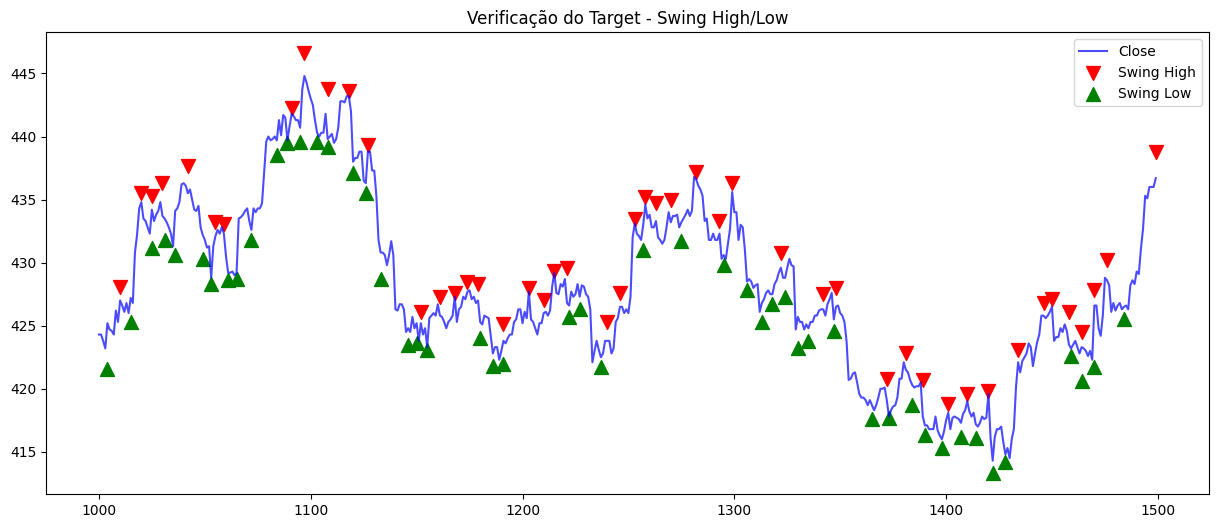

In [954]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,6))
plt.plot(df_amostra['Close'], label='Close', color='blue', alpha=0.7)
plt.scatter(df_amostra[df_amostra['Swing_high'] == True].index, 
            df_amostra[df_amostra['Swing_high'] == True]['High'], 
            color='red', marker='v', s=100, label='Swing High')
plt.scatter(df_amostra[df_amostra['Swing_low'] == True].index, 
            df_amostra[df_amostra['Swing_low'] == True]['Low'], 
            color='green', marker='^', s=100, label='Swing Low')
plt.title('Verificação do Target - Swing High/Low')
plt.legend()
plt.show()

In [853]:
df2 = df_xau.drop(['Media_Ganhos', 
                      'Media_Perdas',
                      'H1', 'H2', 'H3', 
                      'L1', 'L2', 'L3', 
                      'Variacao', 
                      'Ganhos', 'Perdas',
                      'EMA_12', 'EMA_26',
                      'BB_std', 'Stoch_K',
                      'High_anterior', 'High_posterior',
                      'Low_anterior', 'Lower_posterior',
                      'Swing_high', 'Swing_low'], axis=1)


In [854]:
df2.head()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
0,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,-3415.4,-3815.4,None
1,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28,NaN,NaN,NaN,-0.011218,-0.006232,-0.004986,NaN,NaN,NaN,-3415.9,-3815.9,None
2,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124,NaN,NaN,NaN,-0.060809,-0.028600,-0.032209,NaN,NaN,NaN,-3417.4,-3817.4,None
3,2004-06-14 04:00:00,382.6,383.3,382.3,382.6,139,NaN,NaN,NaN,-0.081873,-0.046646,-0.035227,NaN,NaN,NaN,-3417.4,-3817.4,None
4,2004-06-14 08:00:00,382.6,383.8,381.8,382.5,169,NaN,NaN,NaN,-0.095575,-0.061202,-0.034374,NaN,NaN,NaN,-3417.5,-3817.5,Low


In [855]:
df2.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
RSI               14
K_suavizado       10
Stoch_D           12
MACD               0
MACD_Sinal         0
hist               0
BB_media          19
BB_Superior       19
BB_Inferior       19
Dist_Sup           0
Dist_Res           0
Target         25875
dtype: int64

In [856]:
df2['Target'] = df2['Target'].fillna('none')

In [857]:
df2 = df2.dropna()

In [858]:
df2.head()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
19,2004-06-16 20:00:00,383.6,384.6,383.6,383.8,117,47.297297,33.558711,48.989558,0.259305,0.411478,-0.152172,384.600,389.060824,380.139176,-3416.2,-3816.2,none
20,2004-06-17 00:00:00,383.6,384.6,383.0,383.1,108,49.295775,22.463564,34.510618,0.091393,0.346865,-0.255472,384.525,389.035981,380.014019,-3416.9,-3816.9,none
21,2004-06-17 04:00:00,383.1,384.3,383.0,384.3,134,55.033557,19.989107,25.337127,0.040796,0.285196,-0.244400,384.535,389.042899,380.027101,-3415.7,-3815.7,none
22,2004-06-17 08:00:00,384.0,385.8,384.0,385.3,209,58.974359,22.685185,21.712619,0.069010,0.241702,-0.172692,384.670,389.094858,380.245142,-3414.7,-3814.7,none
23,2004-06-17 12:00:00,385.8,387.6,385.6,386.6,603,61.445783,40.883191,27.852494,0.179480,0.229199,-0.049719,384.870,389.262386,380.477614,-3413.4,-3813.4,none


In [859]:
df2['Target'].value_counts()



Target
none    25861
High     3388
Low      3280
Name: count, dtype: int64

In [860]:
df2.shape

(32529, 18)

In [861]:
x = df2[['RSI', 'K_suavizado', 'Stoch_D',
         'MACD', 'MACD_Sinal', 'hist', 'BB_media', 'BB_Superior', 
         'BB_Inferior', 'Dist_Sup', 'Dist_Res']]

y = df2['Target']

In [862]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size= 0.30)

In [863]:
from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier(class_weight='balanced', max_depth=4)
mod_arvore1.fit(x_train1, y_train1)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [864]:
y_pred_test1 = mod_arvore1.predict(x_test1)

In [865]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("-------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[ 740  241   32]
 [ 296  746    1]
 [4051 3476  176]]

-------------------------------------------------

              precision    recall  f1-score   support

        High       0.15      0.73      0.24      1013
         Low       0.17      0.72      0.27      1043
        none       0.84      0.02      0.04      7703

    accuracy                           0.17      9759
   macro avg       0.38      0.49      0.19      9759
weighted avg       0.70      0.17      0.09      9759



In [866]:
df3 = df2

In [867]:
df3['Target'] = ((df3['Close'].shift(-8) - df3['Close']) / (df3['Close']) * 100) 

In [868]:
df3.head()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
19,2004-06-16 20:00:00,383.6,384.6,383.6,383.8,117,47.297297,33.558711,48.989558,0.259305,0.411478,-0.152172,384.600,389.060824,380.139176,-3416.2,-3816.2,0.651381
20,2004-06-17 00:00:00,383.6,384.6,383.0,383.1,108,49.295775,22.463564,34.510618,0.091393,0.346865,-0.255472,384.525,389.035981,380.014019,-3416.9,-3816.9,1.487862
21,2004-06-17 04:00:00,383.1,384.3,383.0,384.3,134,55.033557,19.989107,25.337127,0.040796,0.285196,-0.244400,384.535,389.042899,380.027101,-3415.7,-3815.7,2.810304
22,2004-06-17 08:00:00,384.0,385.8,384.0,385.3,209,58.974359,22.685185,21.712619,0.069010,0.241702,-0.172692,384.670,389.094858,380.245142,-3414.7,-3814.7,2.413704
23,2004-06-17 12:00:00,385.8,387.6,385.6,386.6,603,61.445783,40.883191,27.852494,0.179480,0.229199,-0.049719,384.870,389.262386,380.477614,-3413.4,-3813.4,1.991723


In [869]:
df3.head(20)

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
19,2004-06-16 20:00:00,383.6,384.6,383.6,383.8,117,47.297297,33.558711,48.989558,0.259305,0.411478,-0.152172,384.600,389.060824,380.139176,-3416.2,-3816.2,0.651381
20,2004-06-17 00:00:00,383.6,384.6,383.0,383.1,108,49.295775,22.463564,34.510618,0.091393,0.346865,-0.255472,384.525,389.035981,380.014019,-3416.9,-3816.9,1.487862
21,2004-06-17 04:00:00,383.1,384.3,383.0,384.3,134,55.033557,19.989107,25.337127,0.040796,0.285196,-0.244400,384.535,389.042899,380.027101,-3415.7,-3815.7,2.810304
22,2004-06-17 08:00:00,384.0,385.8,384.0,385.3,209,58.974359,22.685185,21.712619,0.069010,0.241702,-0.172692,384.670,389.094858,380.245142,-3414.7,-3814.7,2.413704
23,2004-06-17 12:00:00,385.8,387.6,385.6,386.6,603,61.445783,40.883191,27.852494,0.179480,0.229199,-0.049719,384.870,389.262386,380.477614,-3413.4,-3813.4,1.991723
24,2004-06-17 16:00:00,385.8,388.8,384.3,388.3,428,68.000000,62.700321,42.089566,0.381434,0.259761,0.121673,385.160,389.658140,380.661860,-3411.7,-3811.7,1.493690
25,2004-06-17 20:00:00,388.3,389.3,387.3,387.6,86,57.718121,75.075942,59.553151,0.485024,0.304950,0.180074,385.310,389.927997,380.692003,-3412.4,-3812.4,1.547988
26,2004-06-18 00:00:00,388.6,388.6,387.1,387.6,87,51.908397,79.438744,72.405002,0.560067,0.356097,0.203970,385.525,390.149363,380.900637,-3412.4,-3812.4,1.547988
27,2004-06-18 04:00:00,387.3,388.1,385.8,386.3,144,41.085271,67.211561,73.908749,0.519097,0.388760,0.130336,385.700,390.151848,381.248152,-3413.7,-3813.7,2.252136
28,2004-06-18 08:00:00,386.6,389.1,385.8,388.8,229,50.980392,73.023770,73.224692,0.661310,0.443355,0.217955,386.015,390.404593,381.625407,-3411.2,-3811.2,1.105967


In [870]:
df3.describe()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
count,32529,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32529.000000,32521.000000
mean,2015-02-22 17:47:26.887392512,1381.179345,1384.956467,1377.278772,1381.237982,12983.920440,51.864617,53.386569,53.385283,0.704387,0.697586,0.006802,1380.236711,1398.704317,1361.769105,-2418.762018,-2818.762018,0.064576
min,2004-06-16 20:00:00,383.100000,384.300000,383.000000,383.100000,1.000000,0.195618,0.823739,2.221228,-55.532354,-47.043433,-21.686334,384.525000,389.035981,380.014019,-3416.900000,-3816.900000,-12.341167
25%,2009-11-09 20:00:00,1062.820000,1065.550000,1059.580000,1062.480000,3135.000000,38.351254,30.046792,31.194608,-2.867889,-2.689930,-0.961328,1063.137500,1076.090723,1047.700081,-2737.520000,-3137.520000,-0.562904
50%,2015-03-02 20:00:00,1297.350000,1300.020000,1294.660000,1297.470000,9908.000000,52.134377,54.614956,54.474159,0.663399,0.654367,0.034135,1297.502000,1311.906684,1284.695509,-2502.530000,-2902.530000,0.077980
75%,2020-06-12 00:00:00,1735.210000,1739.610000,1730.540000,1735.250000,17875.000000,65.811418,77.340605,76.160781,4.111431,3.983747,1.017163,1735.016500,1756.958540,1714.542944,-2064.750000,-2464.750000,0.740579
max,2025-12-01 04:00:00,4254.980000,4256.340000,4245.900000,4255.040000,249196.000000,100.000000,99.116078,98.568328,124.018390,55.762273,68.256117,3731.699000,4178.197986,3622.216811,455.040000,55.040000,17.019509
std,NaN,591.225282,592.780333,589.657247,591.331254,13990.796804,18.298030,26.201761,25.154531,7.131272,6.661711,2.209757,589.981596,597.609948,582.628337,591.331254,591.331254,1.256458


In [871]:
df3 = df3.dropna()

In [872]:
df3.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
RSI            0
K_suavizado    0
Stoch_D        0
MACD           0
MACD_Sinal     0
hist           0
BB_media       0
BB_Superior    0
BB_Inferior    0
Dist_Sup       0
Dist_Res       0
Target         0
dtype: int64

In [924]:
x1 = df4[[
         'MACD', 'MACD_Sinal', 'hist', 'BB_media', 'BB_Superior', 
         'BB_Inferior', 'Dist_Sup', 'CG', 'CG_deviation', 'ER', 'SC', 'Hurst', 'GARCH_vol' ]]

y1 = df4['Target']

In [925]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size = 0.30, random_state=0, shuffle=False)

In [926]:
from sklearn.ensemble import RandomForestRegressor


mod_rf_full = RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=100, random_state=42, n_jobs=-1)
mod_rf_full.fit(x_train2, y_train2)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_jobs=-1,
                      random_state=42)

In [927]:
y_pred_test2 = mod_rf_full.predict(x_test2)

In [928]:
df3_aval = pd.DataFrame({'Real': y_test2, 'Previsto':y_pred_test2})
df3_aval

,Real,Previsto
22695,0.728373,0.025376
22696,0.963912,0.018768
22697,1.172913,0.019968
22698,1.518234,0.016226
22699,2.153434,0.016250
...,...,...
32417,0.633445,-0.811181
32418,0.375869,-0.830119
32419,17.019509,-0.830119
32420,16.870258,-0.830119


In [929]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_test2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)))

Mean Absolute Error: 1.0596531083206826
Root Mean Squared Error: 1.3687202430508147


In [930]:
print('MAE - Treinamento:', metrics.mean_absolute_error(y_train2, mod_rf_full.predict(x_train2)))
print('MAE - Teste:', metrics.mean_absolute_error(y_test2, y_pred_test2))

MAE - Treinamento: 0.9003398653389441
MAE - Teste: 1.0596531083206826


In [931]:

print(y_test2.mean())
print()
print('O percentual do MAE em relacao a media da base: ')
print(round(metrics.mean_absolute_error(y_test2, y_pred_test2)/y_test2.mean()*100,2))

0.09724765011562078

O percentual do MAE em relacao a media da base: 
1089.64


In [932]:
df_modelo = pd.DataFrame({'Feature' : x1.columns, 'Importancia' : mod_rf_full.feature_importances_})

In [933]:
df_modelo
df_modelo.sort_values('Importancia', ascending=False)

,Feature,Importancia
5,BB_Inferior,0.203596
7,CG,0.165743
4,BB_Superior,0.142346
3,BB_media,0.077620
11,Hurst,0.076515
0,MACD,0.076169
6,Dist_Sup,0.068990
1,MACD_Sinal,0.067993
2,hist,0.042446
12,GARCH_vol,0.032563


In [934]:
"""""from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
plot_tree(mod_arvore2
          , feature_names = x.columns[0:9]
          , class_names=['0', '1']
          , rounded= True
          , filled = True
          , fontsize = 10)

plt.show()"""""

'""from sklearn.tree import export_graphviz, plot_tree\nimport matplotlib.pyplot as plt \n\nplt.figure(figsize=(20,10))\nplot_tree(mod_arvore2\n          , feature_names = x.columns[0:9]\n          , class_names=[\'0\', \'1\']\n          , rounded= True\n          , filled = True\n          , fontsize = 10)\n\nplt.show()'

In [936]:
import joblib

joblib.dump(mod_rf_full, 'modelo_RF_Full_H4.pkl')

['modelo_RF_Full_H4.pkl']

In [884]:
from kama import calculate_kama, calculate_efficiency_ratio

df4 = df3
df4 = df4.reset_index(drop=True)
df4.head()



,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,MACD_Sinal,hist,BB_media,BB_Superior,BB_Inferior,Dist_Sup,Dist_Res,Target
0,2004-06-16 20:00:00,383.6,384.6,383.6,383.8,117,47.297297,33.558711,48.989558,0.259305,0.411478,-0.152172,384.600,389.060824,380.139176,-3416.2,-3816.2,0.651381
1,2004-06-17 00:00:00,383.6,384.6,383.0,383.1,108,49.295775,22.463564,34.510618,0.091393,0.346865,-0.255472,384.525,389.035981,380.014019,-3416.9,-3816.9,1.487862
2,2004-06-17 04:00:00,383.1,384.3,383.0,384.3,134,55.033557,19.989107,25.337127,0.040796,0.285196,-0.244400,384.535,389.042899,380.027101,-3415.7,-3815.7,2.810304
3,2004-06-17 08:00:00,384.0,385.8,384.0,385.3,209,58.974359,22.685185,21.712619,0.069010,0.241702,-0.172692,384.670,389.094858,380.245142,-3414.7,-3814.7,2.413704
4,2004-06-17 12:00:00,385.8,387.6,385.6,386.6,603,61.445783,40.883191,27.852494,0.179480,0.229199,-0.049719,384.870,389.262386,380.477614,-3413.4,-3813.4,1.991723


In [885]:
  # sc = (er * (fast_sc - slow_sc) + slow_sc) ** 2

fast_sc = 2 / (2 + 1)
slow_sc = 2 / (30 + 1)

df4['ER'] = calculate_efficiency_ratio(df4['Close'], period=10)
df4['SC'] = (df4['ER'] * (fast_sc - slow_sc)+ slow_sc) ** 2

In [886]:
df4.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
RSI             0
K_suavizado     0
Stoch_D         0
MACD            0
MACD_Sinal      0
hist            0
BB_media        0
BB_Superior     0
BB_Inferior     0
Dist_Sup        0
Dist_Res        0
Target          0
ER             10
SC             10
dtype: int64

In [887]:
df4[['ER', 'SC']].head(20) 

,ER,SC
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [888]:
from cg_gravitacional import calculate_gravitational_center, calculate_cg_deviation

In [889]:
#Calcular o CG
df4['CG'] = calculate_gravitational_center(df4['High'], df4['Low'], df4['Close'], df4['Volume'], period=20)
#Calcular o Desvio
df4['CG_deviation'] = calculate_cg_deviation(df4['Close'], df4['CG'], df4['High'], df4['Low'], atr_period=100)



In [890]:
df4.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
RSI              0
K_suavizado      0
Stoch_D          0
MACD             0
MACD_Sinal       0
hist             0
BB_media         0
BB_Superior      0
BB_Inferior      0
Dist_Sup         0
Dist_Res         0
Target           0
ER              10
SC              10
CG              39
CG_deviation    99
dtype: int64

In [891]:
df4[['CG', 'CG_deviation']].head(200)

,CG,CG_deviation
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,389.743901,1.377242
196,389.972543,0.960477
197,390.183275,0.733874
198,390.371039,0.103555


In [892]:
from garch_models import fit_garch
from hurst_exponent import hurst_rolling

In [893]:
df4['Hurst'] = hurst_rolling(df4['Close'], period = 100)

In [894]:
garch_result = fit_garch(df4['Close'])

In [895]:
df4['GARCH_vol'] = garch_result['volatility']

In [896]:
df4.head()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,...,BB_Inferior,Dist_Sup,Dist_Res,Target,ER,SC,CG,CG_deviation,Hurst,GARCH_vol
0,2004-06-16 20:00:00,383.6,384.6,383.6,383.8,117,47.297297,33.558711,48.989558,0.259305,...,380.139176,-3416.2,-3816.2,0.651381,NaN,NaN,NaN,NaN,NaN,989.781281
1,2004-06-17 00:00:00,383.6,384.6,383.0,383.1,108,49.295775,22.463564,34.510618,0.091393,...,380.014019,-3416.9,-3816.9,1.487862,NaN,NaN,NaN,NaN,NaN,914.051687
2,2004-06-17 04:00:00,383.1,384.3,383.0,384.3,134,55.033557,19.989107,25.337127,0.040796,...,380.027101,-3415.7,-3815.7,2.810304,NaN,NaN,NaN,NaN,NaN,902.859672
3,2004-06-17 08:00:00,384.0,385.8,384.0,385.3,209,58.974359,22.685185,21.712619,0.069010,...,380.245142,-3414.7,-3814.7,2.413704,NaN,NaN,NaN,NaN,NaN,900.164568
4,2004-06-17 12:00:00,385.8,387.6,385.6,386.6,603,61.445783,40.883191,27.852494,0.179480,...,380.477614,-3413.4,-3813.4,1.991723,NaN,NaN,NaN,NaN,NaN,898.912321


In [897]:
df4.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
RSI              0
K_suavizado      0
Stoch_D          0
MACD             0
MACD_Sinal       0
hist             0
BB_media         0
BB_Superior      0
BB_Inferior      0
Dist_Sup         0
Dist_Res         0
Target           0
ER              10
SC              10
CG              39
CG_deviation    99
Hurst           99
GARCH_vol        0
dtype: int64

In [898]:
df4 = df4.dropna()

In [899]:
df4.head(5)

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,...,BB_Inferior,Dist_Sup,Dist_Res,Target,ER,SC,CG,CG_deviation,Hurst,GARCH_vol
99,2004-07-13 00:00:00,407.1,407.3,404.6,405.0,58,38.613861,42.997543,50.022750,2.054306,...,400.706767,-3395.0,-3795.0,-0.543210,0.139241,0.022011,400.867954,1.794981,0.626025,877.316893
100,2004-07-13 04:00:00,404.8,404.8,403.1,403.3,94,33.050847,21.047271,37.173187,1.685987,...,400.983551,-3396.7,-3796.7,0.074386,0.319149,0.065891,401.501062,0.778424,0.628536,878.745110
101,2004-07-13 08:00:00,403.6,404.8,403.5,403.8,62,35.772358,9.372834,24.472549,1.418088,...,401.850510,-3396.2,-3796.2,0.123824,0.362637,0.080020,402.090184,0.740180,0.578072,880.404813
102,2004-07-13 12:00:00,403.8,403.8,400.1,400.1,346,30.769231,5.769231,12.063112,0.896900,...,401.781263,-3399.9,-3799.9,1.174706,0.546875,0.155092,402.525570,-1.039233,0.589509,880.225236
103,2004-07-13 16:00:00,399.6,401.8,399.6,401.3,857,34.000000,11.000589,8.714218,0.574061,...,401.464291,-3398.7,-3798.7,0.573137,0.434783,0.106485,402.863720,-0.668828,0.560171,883.350101


In [900]:
df4 = df4.reset_index(drop=True)

In [901]:
df4.head()

,Date,Open,High,Low,Close,Volume,RSI,K_suavizado,Stoch_D,MACD,...,BB_Inferior,Dist_Sup,Dist_Res,Target,ER,SC,CG,CG_deviation,Hurst,GARCH_vol
0,2004-07-13 00:00:00,407.1,407.3,404.6,405.0,58,38.613861,42.997543,50.022750,2.054306,...,400.706767,-3395.0,-3795.0,-0.543210,0.139241,0.022011,400.867954,1.794981,0.626025,877.316893
1,2004-07-13 04:00:00,404.8,404.8,403.1,403.3,94,33.050847,21.047271,37.173187,1.685987,...,400.983551,-3396.7,-3796.7,0.074386,0.319149,0.065891,401.501062,0.778424,0.628536,878.745110
2,2004-07-13 08:00:00,403.6,404.8,403.5,403.8,62,35.772358,9.372834,24.472549,1.418088,...,401.850510,-3396.2,-3796.2,0.123824,0.362637,0.080020,402.090184,0.740180,0.578072,880.404813
3,2004-07-13 12:00:00,403.8,403.8,400.1,400.1,346,30.769231,5.769231,12.063112,0.896900,...,401.781263,-3399.9,-3799.9,1.174706,0.546875,0.155092,402.525570,-1.039233,0.589509,880.225236
4,2004-07-13 16:00:00,399.6,401.8,399.6,401.3,857,34.000000,11.000589,8.714218,0.574061,...,401.464291,-3398.7,-3798.7,0.573137,0.434783,0.106485,402.863720,-0.668828,0.560171,883.350101


In [937]:
x2 = df4[[
          'BB_media', 'BB_Superior', 
         'BB_Inferior']]

y2 = df4['Target']

In [938]:
x2.shape

(32422, 3)

In [939]:
from sklearn.model_selection import train_test_split

x2_train2, x2_test2, y2_train2, y2_test2 = train_test_split(x2, y2, test_size = 0.30, random_state=0, shuffle=False)

In [940]:
from sklearn.tree import DecisionTreeRegressor

mod_dt_bb = DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)

mod_dt_bb.fit(x2_train2, y2_train2)



DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)

In [941]:
y_pred_test3 = mod_dt_bb.predict(x2_test2)

In [942]:
df3_aval = pd.DataFrame({'Real': y2_test2, 'Previsto':y_pred_test3})
df3_aval

,Real,Previsto
22695,0.728373,0.066354
22696,0.963912,0.066354
22697,1.172913,0.066354
22698,1.518234,0.066354
22699,2.153434,0.066354
...,...,...
32417,0.633445,-0.887869
32418,0.375869,-0.887869
32419,17.019509,-0.887869
32420,16.870258,-0.887869


In [943]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test2, y_pred_test3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test2, y_pred_test3)))

Mean Absolute Error: 1.0893254156054732
Root Mean Squared Error: 1.3999448051892025


In [944]:
print('MAE - Treinamento:', metrics.mean_absolute_error(y2_train2, mod_dt_bb.predict(x2_train2)))
print('MAE - Teste:', metrics.mean_absolute_error(y2_test2, y_pred_test3))

MAE - Treinamento: 0.9106049896123557
MAE - Teste: 1.0893254156054732


In [945]:

print(y2_test2.mean())
print()
print('O percentual do MAE em relacao a media da base: ')
print(round(metrics.mean_absolute_error(y2_test2, y_pred_test3)/y2_test2.mean()*100,2))

0.09724765011562078

O percentual do MAE em relacao a media da base: 
1120.16


In [987]:

threshold = 0.2  # só considera previsões > 0.2% ou < -0.2%

mask = np.abs(y_pred_test3) > threshold
acertos = np.sign(y_pred_test3[mask]) == np.sign(y2_test2[mask])
win_rate = np.mean(acertos) * 100

result = [{"mask": mask,
          "acertos" : acertos,
          "win_rate" : win_rate}]

In [990]:
df_result = pd.DataFrame(result)

In [992]:
df_result.head()

,mask,acertos,win_rate
0,"[False, False, False, False, False, False, Fal...",22708 False 22709 False 22710 False 2...,46.159277


In [947]:
df_modelo = pd.DataFrame({'Feature' : x2.columns, 'Importancia' : mod_dt_bb.feature_importances_})

In [948]:
df_modelo
df_modelo.sort_values('Importancia', ascending=False)

,Feature,Importancia
2,BB_Inferior,0.594765
1,BB_Superior,0.220041
0,BB_media,0.185194


In [949]:
joblib.dump(mod_dt_bb, 'modelo_dt_bb_H4.pkl')

['modelo_dt_bb_H4.pkl']

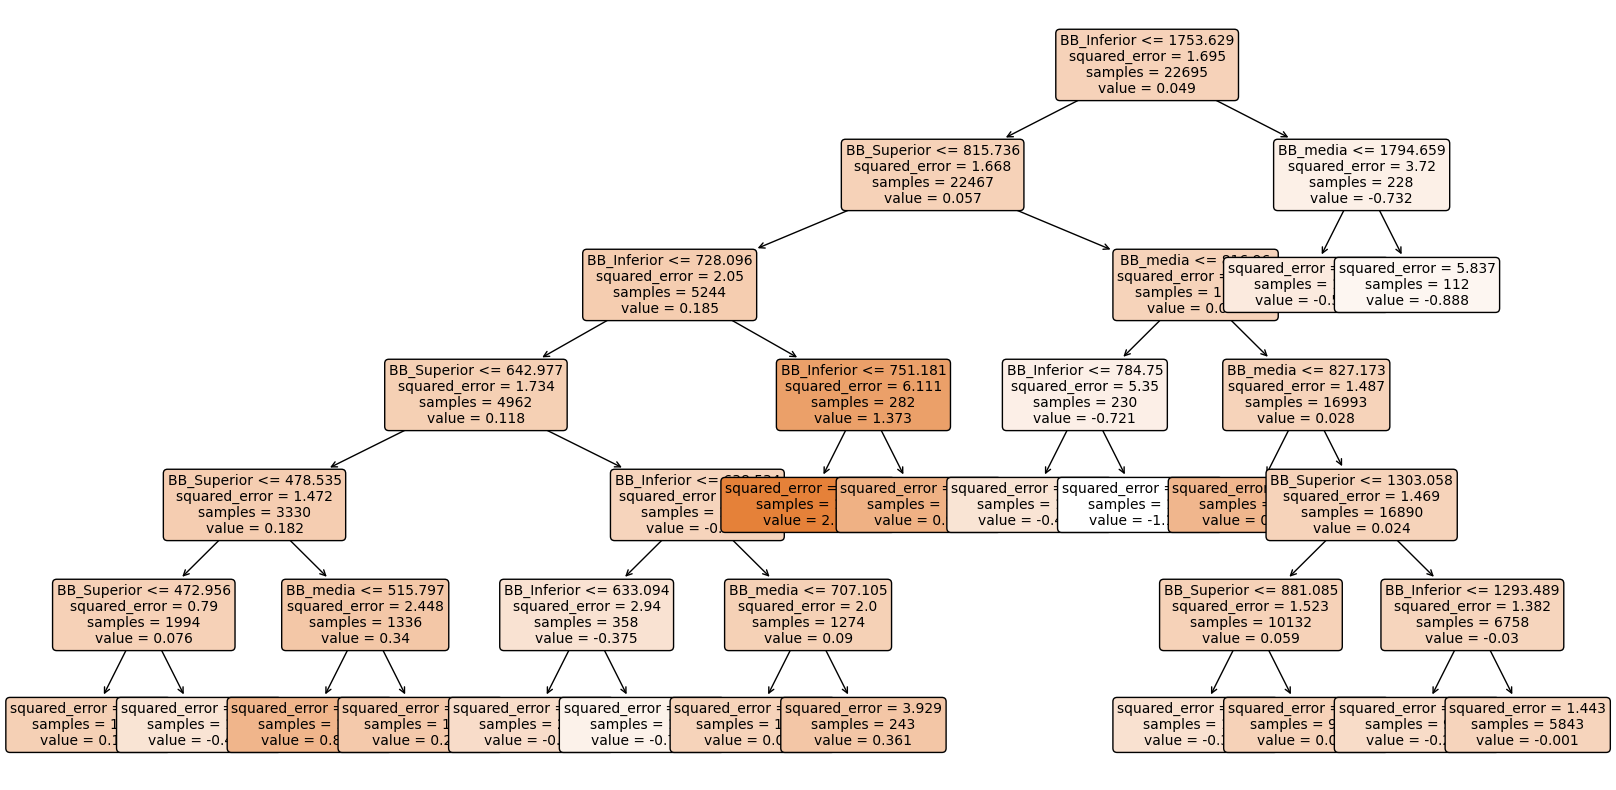

In [ ]:
from io import StringIO
import matplotlib.pyplot as plt 
from IPython.display import Image
from sklearn.tree import export_graphviz, plot_tree
import pydotplus

plt.figure(figsize=(20,10))                                
plot_tree(mod_dt_bb
            , feature_names = x2.columns[0:13]
            , class_names = ['BB_media', 'BB_Superior', 'BB_Inferior']
            , filled = True
            , rounded = True
            , fontsize = 10)

plt.show()